<h1 style="font-size:3rem;color:indianred;"> Predicting fraudulent job postings using Machine Learning</h1>

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not a job posting is fake based on the given attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Expermentation

<h2><font color=steelblue> 1. Problem Definition </font></h2>

In a statement,
> Given a job posting data, can we predict whether or not it is fake?

<h2><font color=steelblue> 2. Data </font></h2>

The data is available on
[Kaggle](https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction?select=fake_job_postings.csv)

<h2><font color=steelblue> 3. Evaluation </font></h2>

> Reach 90% accuracy at predicting whether or not a job posting is fake during the proof of concept.

<h2><font color=steelblue> 4. Features </font></h2>

This is where you'll get different information about each of the features in your data.

* job_id: unique job id
* title: the title of the job ad entry
* location: geographical location of the job ad
* department: Corporate department (e.g. sales)
* salary_range: indicative salary range (e.g. $50,000-$60,000)
* company_profile: a brief company description
* description: The details description of the job ad
* requirements: enlisted requirements for the job opening
* benefits: enlisted offered benefits by the employer
* telecommuting: True for telecommuting positions
* has_company_logo: True if company logo is present
* has_questions: True if screening questions are present
* employment_type: Full-type, Part-time, Contract, etc
* required_experience: Executive, Entry level, Intern, etc
* required_education: Doctorate, Master’s Degree, Bachelor, etc
* industry: Automotive, IT, Health care, Real estate, etc
* function: Consulting, Engineering, Research, Sales etc
* **fraudulent:** target - Classification attribute

<h3><font color=slateblue>  Create dictionary for the features</font></h3>

In [1]:
features = {
    "job_id": "unique job id",
    "title": "the title of the job ad entry",
    "location": "geographical location of the job ad",
    "department": "Corporate department (e.g. sales)",
    "salary_range": "indicative salary range (e.g. $50,000-$60,000)",
    "company_profile": "a brief company description",
    "description": "The details description of the job ad",
    "requirements": "enlisted requirements for the job opening",
    "benefits": "enlisted offered benefits by the employer",
    "telecommuting": "True for telecommuting positions",
    "has_company_logo": "True if company logo is present",
    "has_questions": "True if screening questions are present",
    "employment_type": "Full-type, Part-time, Contract, etc",
    "required_experience": "Executive, Entry level, Intern, etc",
    "required_education": "Doctorate, Master’s Degree, Bachelor, etc",
    "industry": "Automotive, IT, Health care, Real estate, etc",
    "function": "Consulting, Engineering, Research, Sales etc",
    "fraudulent": "target - Classification attribute"
}

<h2><font color=steelblue>Preparing the tools </font></h2>

We're going to use pandas, matplotlib, NumPy and Seaborn for data analysis and manipulation.

In [2]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

<h2><font color=steelblue> Load data </font></h2>

<h3><font color=slateblue> Read CSV file </font></h3>

In [3]:
df = pd.read_csv("data/fake_job_postings.csv")

<h3><font color=slateblue> Get a sample of the data </font></h3>

In [4]:
df.sample(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
16922,16923,Entry Level CSR Wanted $22.50/HR PLUS Commissions,"US, KY, Louisville",NaN,45-85,"LEI Home Enhancements, is an Ohio based compan...",Essential Duties and Responsibilities include ...,Requirements / Qualifications: - Strong organi...,We offer:-Approx $22.50 an hour plus commissio...,0,1,0,Full-time,Entry level,High School or equivalent,Consumer Services,Customer Service,0
1069,1070,Operations Manager,"US, CA, Los Angeles",NaN,40000-50000,GPL Technologies is a solutions provider focus...,GPL Technologies is a data infrastructure comp...,"To be a successful candidate, detailed task ma...",Medical benefits,0,1,0,Full-time,Entry level,High School or equivalent,Information Technology and Services,Administrative,0
982,983,Lead Community & Marketing Coordinator,"US, DC, Washington",NaN,NaN,"Meet cove, a network of neighborhood productiv...","cove, a technology oriented startup business, ...",Required- Bachelor's degree or equivalent expe...,NaN,0,1,1,Full-time,Associate,Bachelor's Degree,Consumer Services,Marketing,0
14591,14592,UI Designer,"EG, C, Maadi",Development,NaN,EME International is a global leader in enterp...,We are looking for a talented UI Designer to c...,2+ years of UI experienceDemonstrable UI desig...,Challenging work environmentMedical Insurance ...,0,1,0,Full-time,Associate,Bachelor's Degree,Telecommunications,Information Technology,0
1480,1481,"Senior Software Engineers, C++","GR, I, Marousi",NaN,NaN,Software Competitiveness International (SOFTCO...,Software Competitiveness International (SOFT C...,NaN,NaN,0,1,0,Full-time,NaN,NaN,Automotive,NaN,0


<h3><font color=slateblue> Get numer of rows and columns </font></h3>

In [5]:
df.shape

(17880, 18)

<h2><font color=steelblue> Data Exploration (exploratory data analysis or EDA)</font></h2>

<h3><font color=slateblue> Get first 5 rows </font></h3>

In [6]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


<h3><font color=slateblue> Get last 5 rows </font></h3>

In [7]:
df.tail()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


<h3><font color=slateblue> Get some info about each column (type, number of null values..)</font></h3>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

<h3><font color=slateblue> Compare the two classes </font></h3>

<h4><font color=darkslategray>Number of fraudulent & non fraudulent job postings</font></h4>

In [9]:
# Let's find out how many of each class there are
df["fraudulent"].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

<h4><font color=darkslategray>Visualize number of fraudulent & non fraudulent job postings in a bar chart</font></h4>

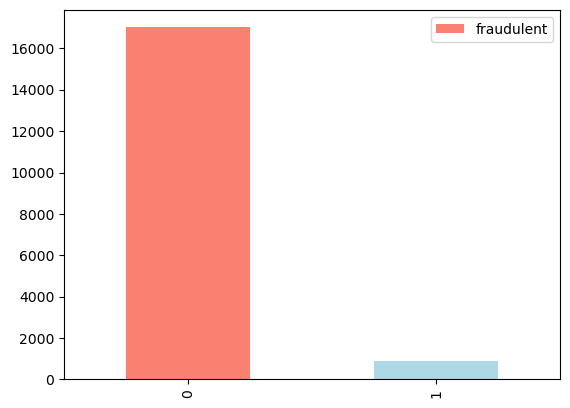

In [10]:
# Visualize the classes with Pandas plot method
df["fraudulent"].value_counts().plot(kind="bar", color=["salmon", "lightblue"], legend=True);

<h4><font color=darkslategray>Visualize number of fraudulent & non fraudulent job postings in a pie chart</font></h4>

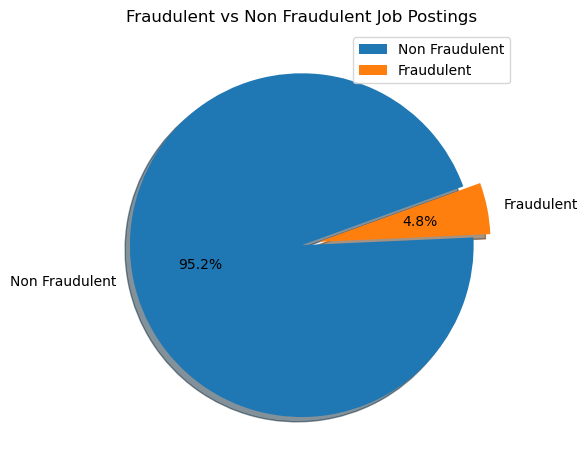

In [11]:
# Visualize the classes in a pie chart
labels = ['Non Fraudulent', 'Fraudulent']
sizes = df["fraudulent"].value_counts()
explode = (0, 0.1)  
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=20)

# Equal aspect ratio ensures that pie is drawn as a circle
# ax.axis('equal')
ax.legend().set_visible(True)

ax.set(title="Fraudulent vs Non Fraudulent Job Postings")
plt.tight_layout()
plt.show()

In [12]:
# kwargs = dict(
#     startangle = 90,
#     colormap   = 'Pastel2',
#     fontsize   = 12,
#     shadow     = True,
#     explode    = (0.08, 0.08),
#     figsize    = (60, 5),
#     autopct    = '%1.1f%%',
#     title      = 'Fraudulent vs non fraudulent job postings',
#     ylabel     = '',
#     legend     = True,
#     labeldistance = None
# )

# ax = df['fraudulent'].value_counts().plot.pie(**kwargs);

# ax.legend(bbox_to_anchor = (1, 1.02), loc='best')
# ax

As we can see, the classes are highly imbalanced.

<h3><font color=slateblue> Check mising values </font></h3>

In [13]:
# Are there any missing values?
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

<h3><font color=slateblue> Fraudulent job postings Frequency according to industry</font></h3>

<h4><font color=darkslategray>Number of industries</font></h4>

In [14]:
# number of industries
df.industry.value_counts()

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: industry, Length: 131, dtype: int64

<h4><font color=darkslategray>Categories of industry</font></h4>

In [15]:
# Categories of industry
df["industry"].unique()

array([nan, 'Marketing and Advertising', 'Computer Software',
       'Hospital & Health Care', 'Online Media',
       'Information Technology and Services', 'Financial Services',
       'Management Consulting', 'Events Services', 'Internet',
       'Facilities Services', 'Consumer Electronics',
       'Telecommunications', 'Consumer Services', 'Construction',
       'Oil & Energy', 'Education Management', 'Building Materials',
       'Banking', 'Food & Beverages', 'Food Production',
       'Health, Wellness and Fitness', 'Insurance', 'E-Learning',
       'Cosmetics', 'Staffing and Recruiting',
       'Venture Capital & Private Equity', 'Leisure, Travel & Tourism',
       'Human Resources', 'Pharmaceuticals', 'Farming', 'Legal Services',
       'Luxury Goods & Jewelry', 'Machinery', 'Real Estate',
       'Mechanical or Industrial Engineering',
       'Public Relations and Communications', 'Consumer Goods',
       'Medical Practice', 'Electrical/Electronic Manufacturing',
       'Hospita

<h4><font color=darkslategray>Number of fake job postings per industry</font></h4>

In [16]:
# Number of fake job postings per industry
df.industry[df["fraudulent"] == 1].value_counts()

Oil & Energy                   109
Accounting                      57
Hospital & Health Care          51
Marketing and Advertising       45
Financial Services              35
                              ... 
Civic & Social Organization      1
Public Safety                    1
Wholesale                        1
Consumer Goods                   1
Online Media                     1
Name: industry, Length: 62, dtype: int64

<h4><font color=darkslategray>Fake job postings VS. industry</font></h4>

In [17]:
# Compare fraudulent column with industry column
pd.crosstab(index=df.fraudulent, 
            columns=df.industry)

industry,Accounting,Airlines/Aviation,Alternative Dispute Resolution,Animation,Apparel & Fashion,Architecture & Planning,Automotive,Aviation & Aerospace,Banking,Biotechnology,...,Translation and Localization,Transportation/Trucking/Railroad,Utilities,Venture Capital & Private Equity,Veterinary,Warehousing,Wholesale,Wine and Spirits,Wireless,Writing and Editing
fraudulent,,,,,,,,,,,,,,,,,,,,,
0,102,62,1,3,95,10,115,24,81,34,...,10,50,32,29,8,50,10,1,4,19
1,57,1,0,2,2,0,5,0,3,4,...,0,3,1,0,0,1,1,0,0,0


Since there are too many industries to visualize on graph, let's get the top 10

<h4><font color=darkslategray>Top 10 industries that have the highest number of fake job postings</font></h4>

In [18]:
# Get top 10 industries that have the highest number of fake job postings
# top_fraudulent_industries = df.fraudulent[df.fraudulent == 1].groupby(df['industry']).value_counts().sort_values(ascending=False).head(10)

top_fraudulent_industries = df.industry[df["fraudulent"] == 1].value_counts().head(10)

top_fraudulent_industries

Oil & Energy                           109
Accounting                              57
Hospital & Health Care                  51
Marketing and Advertising               45
Financial Services                      35
Information Technology and Services     32
Telecommunications                      26
Real Estate                             24
Consumer Services                       24
Leisure, Travel & Tourism               21
Name: industry, dtype: int64

<h4><font color=darkslategray>Visualize top 10 industries that have the highest number of fake job postings</font></h4>

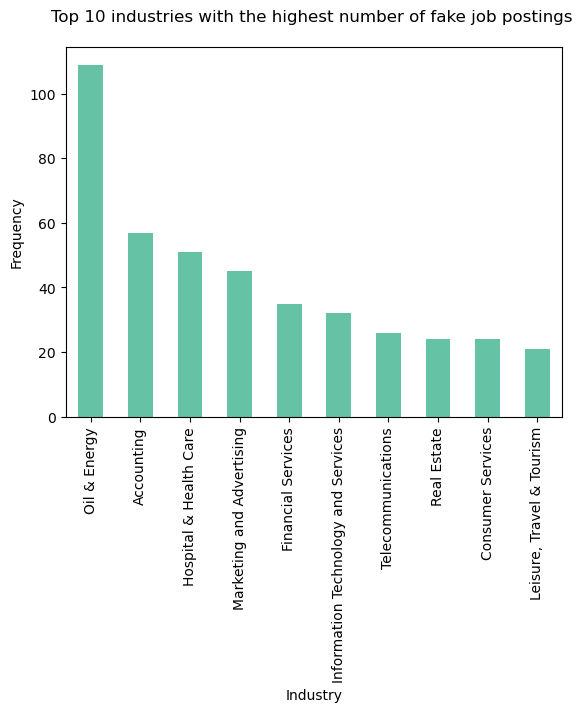

In [19]:
# Visualize top 10 industries that have the highest number of fake job postings
top_fraudulent_industries.plot.bar();

top_fraudulent_industries.plot(kind='bar',
#                                 figsize=(10, 8),
                                title="Top 10 industries with the highest number of fake job postings \n",
                                colormap="Set2",
                                xlabel="Industry",
                                ylabel="Frequency");

Oil & energy and accounting industries have the highest number of fake job postings.

In [20]:
# industries = df[df.fraudulent == 1].groupby(['industry']).agg({'fraudulent': 'sum'})
# industries

In [21]:
# sns.violinplot(data=df, x="industry", y="fraudulent", cut=0)
# sns.violinplot(data=df, x="fraudulent", y="required_experience", scale="count")

<h3><font color=slateblue> Fraudulent job postings Frequency according to employment type</font></h3>

<h4><font color=darkslategray>Number of employment types</font></h4>

In [22]:
df.employment_type.value_counts()

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

<h4><font color=darkslategray>Categories of employment type</font></h4>

In [23]:
df["employment_type"].unique()

array(['Other', 'Full-time', nan, 'Part-time', 'Contract', 'Temporary'],
      dtype=object)

<h4><font color=darkslategray>Visualize categories of employment type</font></h4>

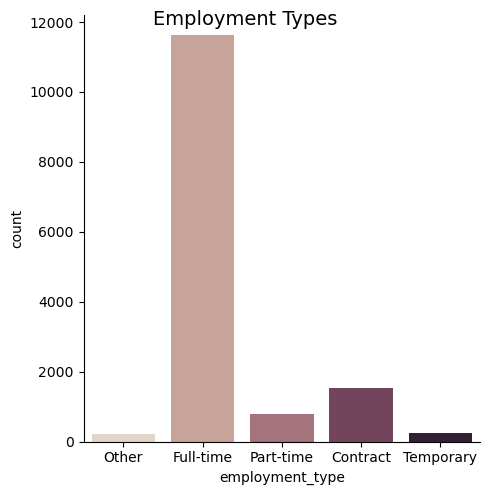

In [24]:
employment_types_graph = sns.catplot(data=df, x="employment_type", kind="count", palette="ch:.25");
employment_types_graph.fig.suptitle("Employment Types", fontsize=14);

<h4><font color=darkslategray>Categories of employment type VS. Fraudulent</font></h4>

In [25]:
pd.crosstab(df.employment_type, df.fraudulent)

fraudulent,0,1
employment_type,,
Contract,1480,44
Full-time,11130,490
Other,212,15
Part-time,723,74
Temporary,239,2


<h4><font color=darkslategray>Visualize categories of employment type VS. Fraudulent</font></h4>

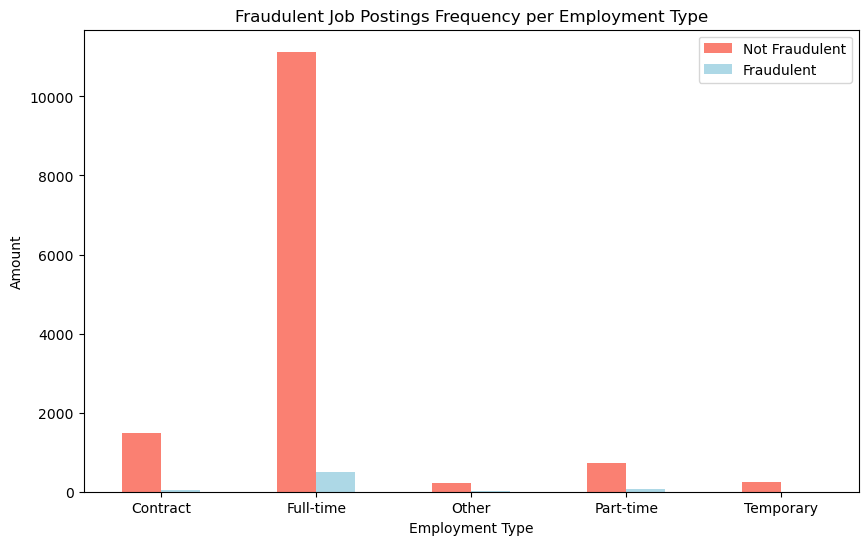

In [26]:
# Make the crosstab more visual
pd.crosstab(df.employment_type, df.fraudulent).plot(kind="bar",
                                  figsize=(10, 6),
                                  color=["salmon", "lightblue"]);

# Add some communication
plt.title("Fraudulent Job Postings Frequency per Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Amount")
plt.legend(["Not Fraudulent", "Fraudulent"])
plt.xticks(rotation=0);

Full time and part time jobs have the highest number of fake job postings.

<h3><font color=slateblue> Fraudulent job postings Frequency according to required experience</font></h3>

<h4><font color=darkslategray>Number of required experiences</font></h4>

In [27]:
df.required_experience.value_counts()

Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

<h4><font color=darkslategray>Categories of required experience</font></h4>

In [28]:
df["required_experience"].unique()

array(['Internship', 'Not Applicable', nan, 'Mid-Senior level',
       'Associate', 'Entry level', 'Executive', 'Director'], dtype=object)

<h4><font color=darkslategray>Categories of required experience VS. Fraudulent</font></h4>

In [29]:
pd.crosstab(df.required_experience, df.fraudulent)

fraudulent,0,1
required_experience,,
Associate,2255,42
Director,372,17
Entry level,2518,179
Executive,131,10
Internship,371,10
Mid-Senior level,3696,113
Not Applicable,1056,60


<h4><font color=darkslategray>Visualize categories of employment type VS. Fraudulent</font></h4>

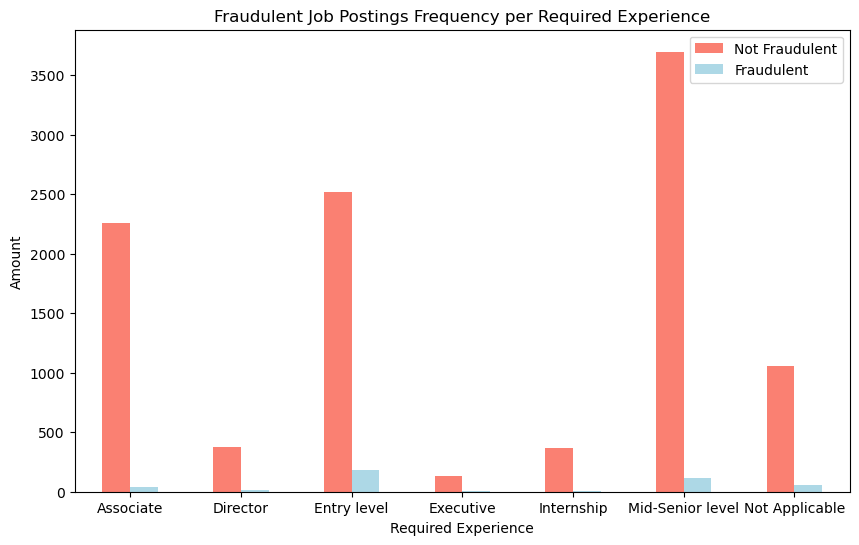

In [30]:
# Make the crosstab more visual
pd.crosstab(df.required_experience, df.fraudulent).plot(kind="bar",
                                  figsize=(10, 6),
                                  color=["salmon", "lightblue"]);

# Add some communication
plt.title("Fraudulent Job Postings Frequency per Required Experience")
plt.xlabel("Required Experience")
plt.ylabel("Amount")
plt.legend(["Not Fraudulent", "Fraudulent"])
plt.xticks(rotation=0);

Entry and mid-senior levels have the highest number of fake job postings.

<h3><font color=slateblue> Fraudulent job postings Frequency according to function</font></h3>

<h4><font color=darkslategray>Number of functions</font></h4>

In [31]:
df.function.value_counts()

Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38
Supply C

<h4><font color=darkslategray>Categories of function</font></h4>

In [32]:
df["function"].unique()

array(['Marketing', 'Customer Service', nan, 'Sales',
       'Health Care Provider', 'Management', 'Information Technology',
       'Other', 'Engineering', 'Administrative', 'Design', 'Production',
       'Education', 'Supply Chain', 'Business Development',
       'Product Management', 'Financial Analyst', 'Consulting',
       'Human Resources', 'Project Management', 'Manufacturing',
       'Public Relations', 'Strategy/Planning', 'Advertising', 'Finance',
       'General Business', 'Research', 'Accounting/Auditing',
       'Art/Creative', 'Quality Assurance', 'Data Analyst',
       'Business Analyst', 'Writing/Editing', 'Distribution', 'Science',
       'Training', 'Purchasing', 'Legal'], dtype=object)

<h4><font color=darkslategray>Categories of function VS. Fraudulent</font></h4>

In [33]:
pd.crosstab(df.function, df.fraudulent)

fraudulent,0,1
function,,
Accounting/Auditing,183,29
Administrative,511,119
Advertising,85,5
Art/Creative,131,1
Business Analyst,83,1
Business Development,215,13
Consulting,140,4
Customer Service,1162,67
Data Analyst,78,4


<h3><font color=slateblue> Fraudulent job postings Frequency according to Required Education</font></h3>

<h4><font color=darkslategray>Number of required educations</font></h4>

In [34]:
df.required_education.value_counts()

Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

<h4><font color=darkslategray>Categories of required education</font></h4>

In [35]:
df["required_education"].unique()

array([nan, "Bachelor's Degree", "Master's Degree",
       'High School or equivalent', 'Unspecified',
       'Some College Coursework Completed', 'Vocational', 'Certification',
       'Associate Degree', 'Professional', 'Doctorate',
       'Some High School Coursework', 'Vocational - Degree',
       'Vocational - HS Diploma'], dtype=object)

<h4><font color=darkslategray>Categories of required education VS. Fraudulent</font></h4>

In [36]:
pd.crosstab(df.required_education, df.fraudulent)

fraudulent,0,1
required_education,,
Associate Degree,268,6
Bachelor's Degree,5045,100
Certification,151,19
Doctorate,25,1
High School or equivalent,1910,170
Master's Degree,385,31
Professional,70,4
Some College Coursework Completed,99,3
Some High School Coursework,7,20


<h3><font color=slateblue> Correlation between numerical columns </font></h3>

<h4><font color=darkslategray>Correlation table</font></h4>

In [37]:
df.corr()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.079872
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.261971
has_questions,-0.087025,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.079872,0.034523,-0.261971,-0.091627,1.000000


<h4><font color=darkslategray>Visualize correlation table</font></h4>

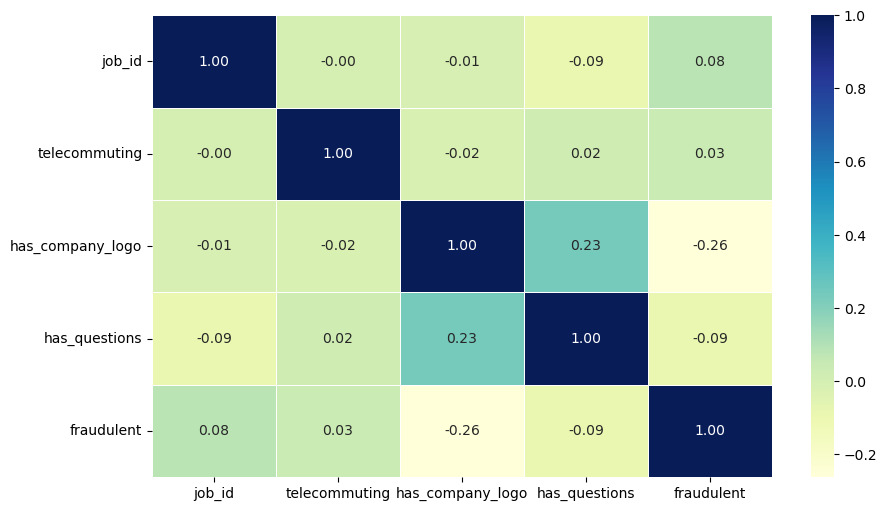

In [38]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

The correlation matrix does not show any strong positive or negative correlations between the numerical data.

<h2><font color=steelblue> Data cleaning </font></h2>

1. Clean Nan values (department, salary_range, benefits, requirements, benefits, employment_type, required_experiece, required_education, industry, function)
2. Categorical columns need to be seperated (employment_type, industry, function, department).
3. Salary range needs to be seperate into minimum and maximum.
4. Location needs to be seperated.
5. Natural Language processing for description and requirements columns.

<h3><font color=slateblue> Get a sample of the data </font></h3>

In [39]:
df.sample(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
5533,5534,Human Resources Partner,"US, CA, Redlands",HR,NaN,Our passion for improving quality of life thro...,Join a growing team of talented individuals an...,"EDUCATION: Bachelor’s in human resources, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Human Resources,Human Resources,0
8464,8465,Would you like to join our IT Team?,"RO, ,",NaN,NaN,Skyconsult is a global consulting company with...,"If you are IT&amp;C passionate, we would like ...",Requirements:Superior studies in Information T...,You will work within a company that provides a...,0,1,0,Full-time,Internship,Bachelor's Degree,Information Technology and Services,NaN,0
6644,6645,Digital Project Manager,"GB, ESX, Hastings",NaN,NaN,NaN,We are looking for someone to join our busy an...,We would like you to have been project managem...,"Dependent on experience (starting from £22,000...",0,0,0,Full-time,NaN,NaN,Information Technology and Services,Information Technology,0
1065,1066,Trades and Labour Construction Recruitment Con...,"GB, ,",NaN,NaN,"Recruitment to Recruitment specialists, coveri...","My client is looking for an experienced, 12 mo...",NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
16607,16608,CC&B Consultant,"US, OH, Cincinnati",NaN,NaN,e-Solutions Inc. is a talent-driven consulting...,Title : CC&amp;B Consult...,NOTE.. Please mention the job number for which...,NaN,0,1,0,Full-time,NaN,NaN,Information Technology and Services,NaN,0


<h3><font color=slateblue> Type of columns </font></h3>

In [40]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

<h3><font color=slateblue> Check mising values </font></h3>

In [41]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

<h3><font color=slateblue> Seperate location </font></h3>

In [42]:
df[["country", "state", "city"]] = df["location"].str.split(",", n=2, expand=True)

<h3><font color=slateblue> Get a sample of the data </font></h3>

In [43]:
df.sample(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,state,city
14303,14304,Licensed Practical Nurse Part-time (NW Georgia...,"US, GA, Ringgold",NaN,NaN,Crossroads Treatment Centers is a nationally-a...,"Crossroads Treatment Centers in Ringgold, GA i...",Qualifications include: A positive attitude an...,NaN,0,...,1,Part-time,Associate,Certification,Medical Practice,Health Care Provider,0,US,GA,Ringgold
2921,2922,Church Administrator/ Secretary,"US, OH, Cincinnati",NaN,NaN,NaN,Description of the Church Administrative Assis...,Qualifications of the Church Administrative As...,Competitive weekly pay and full benefits after...,0,...,0,NaN,NaN,NaN,NaN,NaN,1,US,OH,Cincinnati
13925,13926,Programmatic Media Manager,"US, WA, Seattle",Media,NaN,Since 1978Our goal has been to create engaging...,DETAILS•Location: Drake Cooper’s Seattle Offic...,NaN,"Job Type: Full time, 20 - 30 hours per weekPay...",0,...,0,Other,NaN,Unspecified,Marketing and Advertising,Advertising,0,US,WA,Seattle
13054,13055,Customer Service Associate - Part Time,"US, CA, Milpitas",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,...,0,Part-time,Entry level,High School or equivalent,Consumer Services,Administrative,0,US,CA,Milpitas
11013,11014,LDAP Admin,"US, ,",NaN,NaN,NaN,"a) Typical Duties: Install, configure a...",a) Required Skills and/or Product Knowle...,NaN,0,...,0,Contract,NaN,NaN,Computer & Network Security,NaN,0,US,,


<h3><font color=slateblue> Seperate salary range into minimum and maximum and Cast type to integer</font></h3>

In [44]:
df[["minimum_salary", "maximum_salary"]] = df["salary_range"].str.split("-", n=1, expand=True)

<h3><font color=slateblue> Get a sample of the data </font></h3>

In [45]:
df.sample(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,required_experience,required_education,industry,function,fraudulent,country,state,city,minimum_salary,maximum_salary
16733,16734,Customer Success Engineer,"US, CA, San Francisco",NaN,NaN,Runscope is building tools for developers work...,We are looking for experienced a Customer Succ...,Strong written and verbal communication skills...,Be a part of an experienced team who have work...,0,...,Associate,NaN,Computer Software,NaN,0,US,CA,San Francisco,NaN,NaN
17517,17518,Cash Job Opportunity To Immediate Start.,"AU, NSW, Sydney",NaN,NaN,NaN,Cash Job Opportunity To Immediate Start. No Ex...,NaN,NaN,0,...,NaN,NaN,NaN,NaN,1,AU,NSW,Sydney,NaN,NaN
7045,7046,"Reservoir Engineer, A&D Advisor","US, OK, Oklahoma City",Acquisitions and Divesments,NaN,Valor Services provides Workforce Solutions th...,To support planned growth a leading E&amp;P is...,Ideal candidate will have the following experi...,Please contact me directly to have a confident...,0,...,Director,Master's Degree,Oil & Energy,Finance,0,US,OK,Oklahoma City,NaN,NaN
15709,15710,"Frontend developer, Minsk","BY, , Minsk",NaN,NaN,NaN,Adform is succesful European display ad tech c...,Do you have these skills? Deep understanding o...,"Creative, challenging and fast growing produ...",0,...,NaN,NaN,NaN,NaN,0,BY,,Minsk,NaN,NaN
11403,11404,Contract SilverStripe Developer,"NZ, , Wellington",NaN,NaN,SilverStripe CMS &amp; Framework is an open so...,We are looking for a contract SilverStripe dev...,NaN,NaN,0,...,NaN,NaN,NaN,NaN,0,NZ,,Wellington,NaN,NaN


<h3><font color=slateblue> Fill Minimum and Maximum salary columns and Convert them to integers </font></h3>

In [46]:
# Fill Minimum and Maximum salary columns
df["minimum_salary"].fillna(-1, inplace=True)
df["maximum_salary"].fillna(-1, inplace=True)

# Fill in random text data in salary columns
df.loc[df['minimum_salary']  == "Oct", "minimum_salary"] = -1
df.loc[df['minimum_salary']  == "Jun", "minimum_salary"] = -1
df.loc[df['minimum_salary']  == "Dec", "minimum_salary"] = -1

df.loc[df['maximum_salary']  == "Dec", "maximum_salary"] = -1
df.loc[df['maximum_salary']  == "Apr", "maximum_salary"] = -1
df.loc[df['maximum_salary']  == "Sep", "maximum_salary"] = -1
df.loc[df['maximum_salary']  == "Jun", "maximum_salary"] = -1
df.loc[df['maximum_salary']  == "Oct", "maximum_salary"] = -1
df.loc[df['maximum_salary']  == "Nov", "maximum_salary"] = -1

# Convert salary columns to integers
df["minimum_salary"] = df["minimum_salary"].astype(int)
df["maximum_salary"] = df["maximum_salary"].astype(int)

<h3><font color=slateblue> View types </font></h3>

In [47]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
country                object
state                  object
city                   object
minimum_salary          int32
maximum_salary          int32
dtype: object

<h3><font color=slateblue> Drop text columns and columns that were seperated for now </font></h3>

In [48]:
df.drop(["company_profile", "requirements", "benefits", "description", "salary_range", "job_id", "title", "location"], axis=1, inplace=True)

<h3><font color=slateblue> Get columns </font></h3>

In [49]:
df.columns

Index(['department', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent', 'country', 'state', 'city',
       'minimum_salary', 'maximum_salary'],
      dtype='object')

<h3><font color=slateblue> Get fraudulent jobs per country </font></h3>

<h4><font color=darkslategray>Number of job postings per country</font></h4>

In [50]:
df.country.value_counts()

US    10656
GB     2384
GR      940
CA      457
DE      383
      ...  
SI        1
PE        1
SD        1
UG        1
KH        1
Name: country, Length: 90, dtype: int64

<h4><font color=darkslategray>Number of fraudulent jobs per country</font></h4>

In [51]:
pd.crosstab(index=df.fraudulent, 
            columns=df.country)

country,AE,AL,AM,AR,AT,AU,BD,BE,BG,BH,...,TR,TT,TW,UA,UG,US,VI,VN,ZA,ZM
fraudulent,,,,,,,,,,,,,,,,,,,,,
0,53,1,2,9,14,174,2,117,17,4,...,17,4,2,13,1,9926,3,4,39,2
1,1,0,0,0,0,40,0,0,0,5,...,0,0,2,0,0,730,0,0,1,0


<h4><font color=darkslategray>Top 10 countries that have the highest number of fake job postings</font></h4>

In [52]:
top_fraudulent_countries = df.country[df["fraudulent"] == 1].value_counts().head(10)

top_fraudulent_countries

US    730
AU     40
GB     23
MY     12
CA     12
QA      6
BH      5
IN      4
PL      3
TW      2
Name: country, dtype: int64

<h4><font color=darkslategray>Visualize top 10 countries that have the highest number of fake job postings</font></h4>

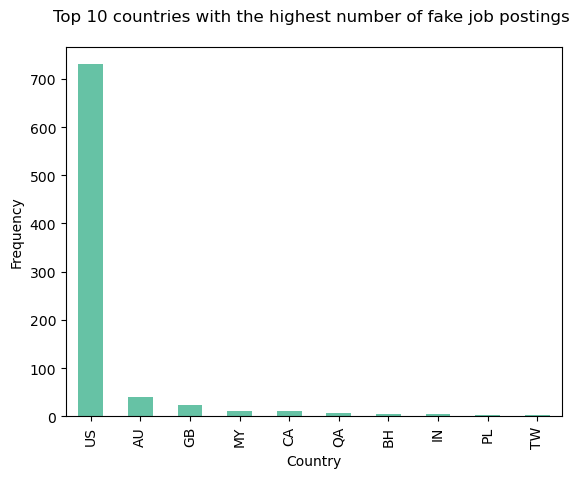

In [53]:
# Visualize top 10 industries that have the highest number of fake job postings
top_fraudulent_countries.plot.bar();

top_fraudulent_countries.plot(kind='bar',
#                                 figsize=(10, 8),
                                title="Top 10 countries with the highest number of fake job postings \n",
                                colormap="Set2",
                                xlabel="Country",
                                ylabel="Frequency");

<h3><font color=slateblue> Process data by filling missing data and converting data to numbers </font></h3>

In [54]:
def preprocess_data(df):
    # Fill numeric rows with -1
    for label, content in df.items():
        # Fill missing numerical values
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(-1)
                
        # Fill categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1       
    
    return df

In [55]:
preprocess_data(df)

,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,state,city,minimum_salary,maximum_salary
0,759,0,1,0,3,5,0,0,23,0,86,229,1459,-1,-1
1,1162,0,1,0,2,7,0,76,8,0,61,1,190,-1,-1
2,0,0,1,0,0,0,0,0,0,0,86,157,2214,-1,-1
3,1055,0,1,0,2,6,2,23,32,0,86,106,2165,-1,-1
4,0,0,1,1,2,6,2,52,17,0,86,132,788,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,1055,0,1,1,2,6,0,23,32,0,13,236,2083,-1,-1
17876,63,0,1,1,2,6,2,62,1,0,86,240,1631,-1,-1
17877,0,0,0,0,2,0,0,0,0,0,86,290,977,-1,-1
17878,0,0,0,1,1,7,7,49,10,0,57,177,1116,-1,-1


<h3><font color=slateblue> Get a sample of the data </font></h3>

In [56]:
df.sample(5)

,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,state,city,minimum_salary,maximum_salary
1498,0,0,1,0,2,6,2,11,0,0,86,106,2165,-1,-1
8873,0,0,1,0,2,0,2,53,0,0,30,156,175,-1,-1
14140,380,0,0,1,2,0,0,0,0,0,86,134,180,-1,-1
2946,0,0,1,1,1,0,2,32,0,0,86,85,1823,-1,-1
4100,0,0,1,1,1,1,5,36,32,0,31,1,1,-1,-1


<h3><font color=slateblue> Correlation of numerical variables </font></h3>

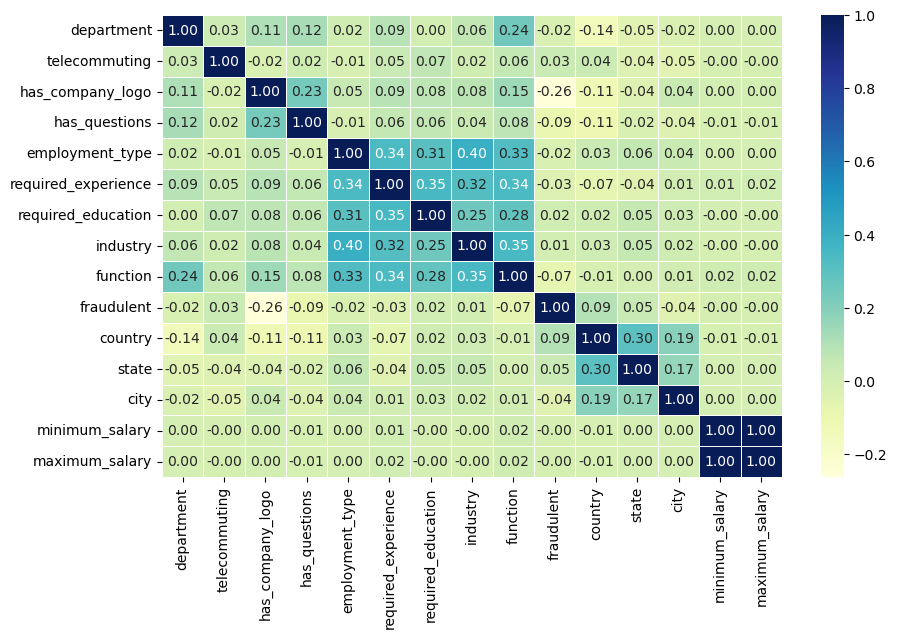

In [57]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

<h3><font color=slateblue> Balance classes </font></h3>

In [58]:
np.random.seed(42)

df_real = df[df.fraudulent == 0].sample(865)
df_fake = df[df.fraudulent == 1]

df_balanced = pd.concat([df_real, df_fake], ignore_index=True, sort=False)

# shuffle classes
from sklearn.utils import shuffle
df_balanced = shuffle(df_balanced)

df_balanced.head(10)

,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,state,city,minimum_salary,maximum_salary
1198,0,0,0,0,2,0,0,0,0,1,86,157,638,-1,-1
1133,0,0,0,1,0,0,0,0,0,1,86,132,2043,-1,-1
1526,0,0,0,0,2,0,0,59,0,1,86,85,1,-1,-1
10,0,0,1,1,2,6,5,108,0,0,86,232,545,-1,-1
1043,568,0,0,0,0,0,0,0,0,1,28,184,1,-1,-1
1306,0,0,0,0,1,0,0,108,0,1,86,191,1767,-1,-1
513,389,0,1,1,0,0,0,76,3,0,86,158,317,-1,-1
499,0,0,1,1,2,6,2,40,23,0,28,184,1192,-1,-1
228,0,0,0,0,2,6,0,34,0,0,25,1,459,-1,-1
929,0,0,1,0,2,0,0,89,13,1,86,290,977,-1,-1


<h2><font color=steelblue> Modelling </font></h2>

Since it is a classification problem, here are the avaiable models from SciKit Learn.

<div>
<img src="images/classification-map.png" width="500"/>
</div>

<h3><font color=slateblue> LinearSVC </font></h3>

<h4><font color=darkslategray> Train model </font></h4>

In [59]:
# Let's build a machine learning model
from sklearn import svm
from sklearn.model_selection import train_test_split

X = df_balanced.drop("fraudulent", axis=1)
y = df_balanced["fraudulent"]

# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

model = svm.LinearSVC(dual=False)

model.fit(X_train, y_train)

LinearSVC(dual=False)

<h4><font color=darkslategray> Score training set </font></h4>

In [60]:
model.score(X_train, y_train)

0.7471098265895953

<h4><font color=darkslategray> Score test set </font></h4>

1. Accuracy

In [61]:
model.score(X_test, y_test)

0.7348703170028819

2. Confusion matrix

In [62]:
y_preds = model.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix

# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[144  37]
 [ 55 111]]


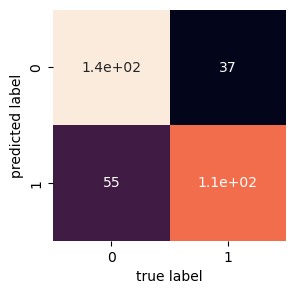

In [64]:
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True, # Annotate the boxes
                 cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label");

<h3><font color=slateblue> Gaussian Naive Bayes </font></h3>

<h4><font color=darkslategray> Train model </font></h4>

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X = df.drop("fraudulent", axis=1)
y = df["fraudulent"]

# Random seed for reproducibility
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

<h4><font color=darkslategray> Score training set </font></h4>

In [66]:
gnb.score(X_train, y_train)

0.04893736017897092

<h4><font color=darkslategray> Score test set </font></h4>

In [67]:
gnb.score(X_test, y_test)

0.051733780760626395